1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock_function(x, y):
    return (x ** 2) + (100 * ((y - x**2)**2))

def rosenbrock_function_gradient(x, y):
    gradient_x = 2 * x *(1 + 100 * (x**2 - y))
    gradient_y = 200 * (y - x**2)
    return gradient_x, gradient_y

def func2(x, y):
    return ((50 * (x**2 + y**2)**3)/9) - ((209 * (x**2 + y**2)**2)/18) + ((59 * (x**2 + y**2))/9)

def func2_gradient(x, y):
    gradient_x = (2*x * ((150*(x**2 + y**2)**2) - (209*(x**2 + y**2)) + 59)) / 9
    gradient_y = (2*y * ((150*(x**2 + y**2)**2) - (209*(x**2 + y**2)) + 59)) / 9
    return gradient_x, gradient_y

def optimization_direction(x_gradient, y_gradient):
    for i in range(len(x_gradient) - 1):
        dx = x_gradient[i + 1] - x_gradient[i]
        dy = y_gradient[i + 1] - y_gradient[i]
        plt.arrow(x_gradient[i], y_gradient[i], dx, dy, head_width=0.02, head_length=0.02, fc='black', ec='black')

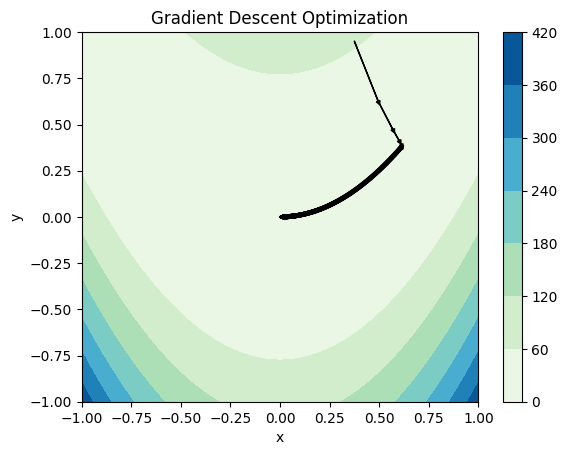

Final x: 0.01669822380379111
Final y: 0.000284506137977406


In [2]:
learning_rate = 0.002
epochs = 1000

np.random.seed(42)
x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

# Lists to store the values of x, y, and the objective function during iterations
x_gradient1 = []
y_gradient1 = []

x_gradient1.append(x)
y_gradient1.append(y)

def update_gradient_descent(x, y, learning_rate):
    gradient_x, gradient_y = rosenbrock_function_gradient(x, y)
    x -= learning_rate * gradient_x
    y -= learning_rate * gradient_y
    return x, y

# Gradient descent optimization
for i in range(epochs): 
    # Update x and y using the gradient descent rule
    x, y = update_gradient_descent(x, y, learning_rate)
    
    # Store the updated values and the objective function value
    x_gradient1.append(x)
    y_gradient1.append(y)


x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock_function(X, Y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
#plt.plot(x_gradient1, y_gradient1, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization')

# Add arrows to show the direction of optimization
optimization_direction(x_gradient1, y_gradient1)
plt.show()

# Print the final values of x and y
print("Final x:", x_gradient1[-1])
print("Final y:", y_gradient1[-1])


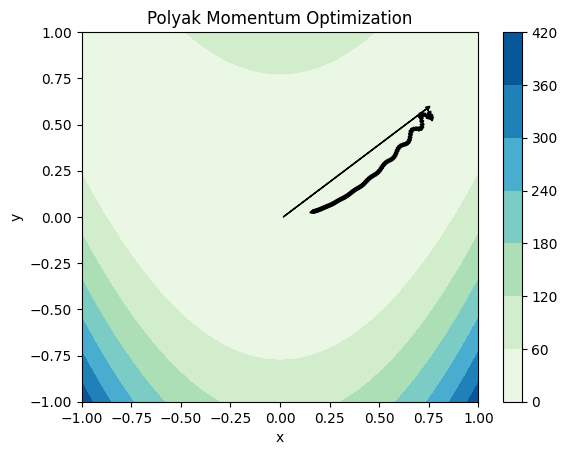

Final x: 0.16910963515106425
Final y: 0.029259399793921483


In [3]:
momentum_rate = 0.9
learning_rate = 0.001
epochs = 100

x_polyak1 = []
y_polyak1 = []

x_polyak1.append(x)
y_polyak1.append(y)

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

v_x = 0
v_y = 0

def update_polyak(x, y, learning_rate, v_x, v_y):
    gradient_x, gradient_y = rosenbrock_function_gradient(x, y)
    v_x = momentum_rate * v_x + learning_rate * gradient_x
    v_y = momentum_rate * v_y + learning_rate * gradient_y
    x -= v_x
    y -= v_y
    return x, y, v_x, v_y

for i in range(epochs): 
    x, y, v_x, v_y = update_polyak(x, y, learning_rate, v_x, v_y)
    
    x_polyak1.append(x)
    y_polyak1.append(y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polyak Momentum Optimization')

optimization_direction(x_polyak1, y_polyak1)
plt.show()

print("Final x:", x_polyak1[-1])
print("Final y:", y_polyak1[-1])

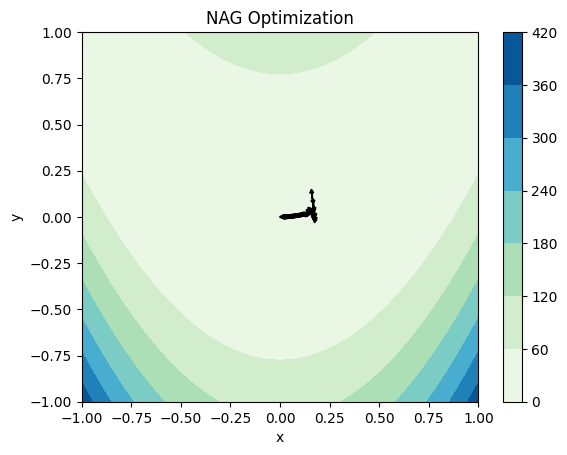

Final x: 0.018778395522251978
Final y: 0.00035802291056383825


In [4]:
momentum_rate = 0.9
learning_rate = 0.001
epochs = 100

x_nag1 = []
y_nag1 = []

x_nag1.append(x)
y_nag1.append(y)

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

v_x = 0
v_y = 0

def update_nag(x, y, learning_rate, v_x, v_y):
    gradient_x, gradient_y = rosenbrock_function_gradient(x - momentum_rate * v_x, y - momentum_rate * v_y)
    v_x = momentum_rate * v_x + learning_rate * gradient_x
    v_y = momentum_rate * v_y + learning_rate * gradient_y
    x -= v_x
    y -= v_y
    return x, y, v_x, v_y

for i in range(epochs): 
    x, y, v_x, v_y = update_nag(x, y, learning_rate, v_x, v_y)
    
    x_nag1.append(x)
    y_nag1.append(y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('NAG Optimization')

optimization_direction(x_nag1, y_nag1)
plt.show()

print("Final x:", x_nag1[-1])
print("Final y:", y_nag1[-1])

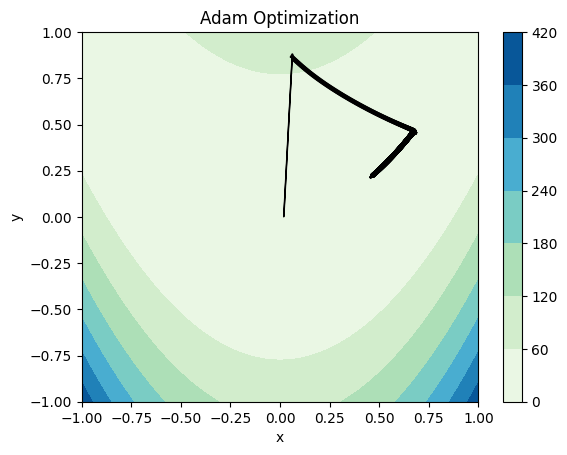

Final x: 0.4675874446957212
Final y: 0.2249513483955298


In [5]:
learning_rate = 0.003
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = 2000

x_adam1 = []
y_adam1 = []

x_adam1.append(x)
y_adam1.append(y)

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

v_x = 0
v_y = 0
m_x = 0
m_y = 0
t = 1

def update_adam(x, y, learning_rate, v_x, v_y, m_x, m_y, t):
    gradient_x, gradient_y = rosenbrock_function_gradient(x, y)

    # Update first moment
    m_x = beta1 * m_x + (1 - beta1) * gradient_x
    m_y = beta1 * m_y + (1 - beta1) * gradient_y

    mh_x = m_x / (1 - beta1**t)
    mh_y = m_y / (1 - beta1**t)
        
    # Update second moment
    v_x = beta2 * v_x + (1 - beta2) * (gradient_x**2)
    v_y = beta2 * v_y + (1 - beta2) * (gradient_y**2)

    vh_x = v_x / (1 - beta2**t)
    vh_y = v_y / (1 - beta2**t)

    x -= learning_rate * mh_x / (np.sqrt(vh_x) + epsilon)
    y -= learning_rate * mh_y / (np.sqrt(vh_y) + epsilon)

    t += 1
    return x, y, v_x, v_y, m_x, m_y, t

for i in range(epochs): 
    x, y, v_x, v_y, m_x, m_y, t = update_adam(x, y, learning_rate, v_x, v_y, m_x, m_y, t)
    
    x_adam1.append(x)
    y_adam1.append(y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Adam Optimization')

optimization_direction(x_adam1, y_adam1)
plt.show()

print("Final x:", x_adam1[-1])
print("Final y:", y_adam1[-1])

2

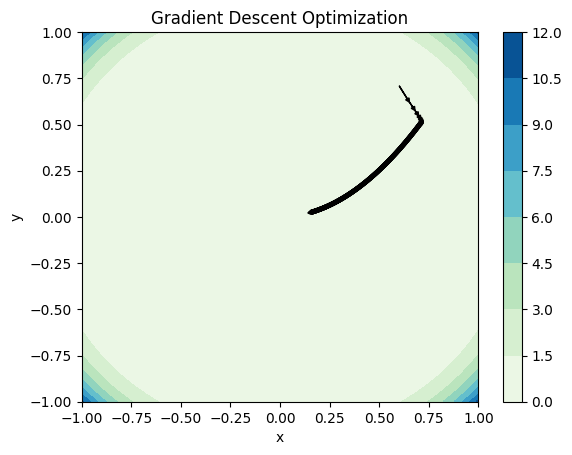

Final x: 0.16011920807574498
Final y: 0.026133971924990982


In [6]:
learning_rate = 0.001
epochs = 1000

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

x_gradient2 = []
y_gradient2 = []

x_gradient2.append(x)
y_gradient2.append(y)

for i in range(epochs): 
    x, y = update_gradient_descent(x, y, learning_rate)
    
    x_gradient2.append(x)
    y_gradient2.append(y)


x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = func2(X, Y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization')

optimization_direction(x_gradient2, y_gradient2)
plt.show()

print("Final x:", x_gradient2[-1])
print("Final y:", y_gradient2[-1])


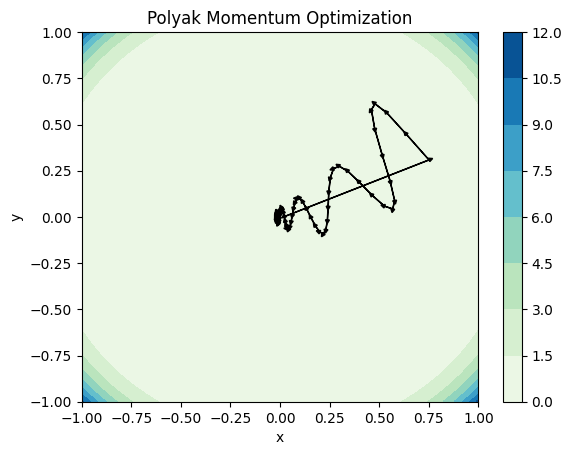

Final x: -0.010503628810164528
Final y: 0.0006502777082347466


In [8]:
momentum_rate = 0.9
learning_rate = 0.001
epochs = 100

x_polyak2 = []
y_polyak2 = []

x_polyak2.append(x)
y_polyak2.append(y)

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

v_x = 0
v_y = 0

for i in range(epochs): 
    x, y, v_x, v_y = update_polyak(x, y, learning_rate, v_x, v_y)
    
    x_polyak2.append(x)
    y_polyak2.append(y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polyak Momentum Optimization')

optimization_direction(x_polyak2, y_polyak2)
plt.show()

print("Final x:", x_polyak2[-1])
print("Final y:", y_polyak2[-1])

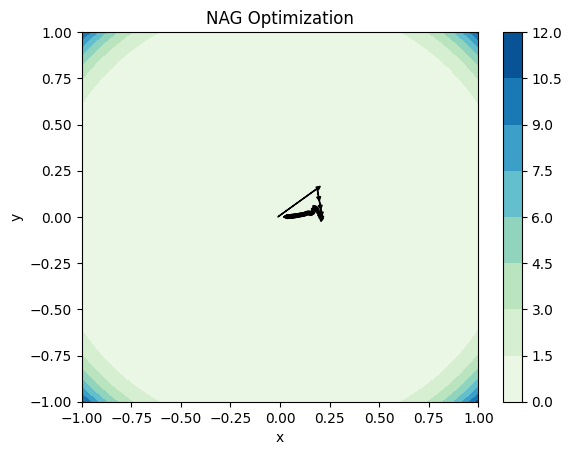

Final x: 0.03711258065740105
Final y: 0.0013987475394418919


In [9]:
momentum_rate = 0.9
learning_rate = 0.001
epochs = 80

x_nag2 = []
y_nag2 = []

x_nag2.append(x)
y_nag2.append(y)

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

v_x = 0
v_y = 0

for i in range(epochs): 
    x, y, v_x, v_y = update_nag(x, y, learning_rate, v_x, v_y)
    
    x_nag2.append(x)
    y_nag2.append(y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('NAG Optimization')

optimization_direction(x_nag2, y_nag2)
plt.show()

print("Final x:", x_nag2[-1])
print("Final y:", y_nag2[-1])

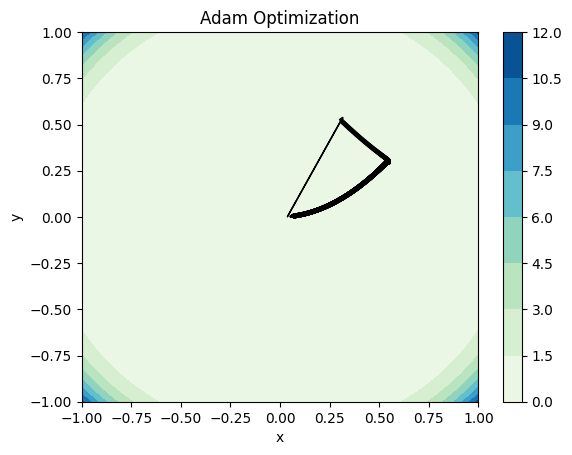

Final x: 0.07004490446486573
Final y: 0.005177011411947755


In [10]:
learning_rate = 0.003
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = 2000

x_adam2 = []
y_adam2 = []

x_adam2.append(x)
y_adam2.append(y)

x = np.float64(np.random.rand())
y = np.float64(np.random.rand())

v_x = 0
v_y = 0
m_x = 0
m_y = 0
t = 1

for i in range(epochs): 
    x, y, v_x, v_y, m_x, m_y, t = update_adam(x, y, learning_rate, v_x, v_y, m_x, m_y, t)
    
    x_adam2.append(x)
    y_adam2.append(y)

plt.contourf(X, Y, Z, cmap='GnBu')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Adam Optimization')

optimization_direction(x_adam2, y_adam2)
plt.show()

print("Final x:", x_adam2[-1])
print("Final y:", y_adam2[-1])